# Solving 10 Queens using pygenetic

In this example we are going to walk through the usage of GAEngine to solve the N-Queens problem 
The objective would be to place queens on single board such that all are in safe position
<b>Each configuration of board represents a potential candidate solution for the problem</b>


## 1. Chromosome Representation

<img src="nQueens-Chromosome.png" style="width:700px;">

For the given chess board, the chromosome is encoded as the row number in which each the queen is present in each column of the chess board. It can also be encoded as the column number in which each the queen is present in each row of the chess board (as done in this code)

This can be easily achieved by using the `RangeFactory` of `pygenetic`. <br/>
The `RangeFactory` takes the following parameters
* minValue = minimum value a gene can take = 0 <br/>
* maxValue = minimum value a gene can take = 9 <br/>
* duplicates = if duplicates are allowed = False <br/>
* noOfGenes = number of genes in the chromosome = 10

In [1]:
from pygenetic import ChromosomeFactory

factory = ChromosomeFactory.ChromosomeRangeFactory(minValue=0,maxValue=9,noOfGenes=10,duplicates=False)

You can also check if the factory works as expected by calling `createChromosome` function and observing the chromosome produced by the factory

In [2]:
# Code to test if factory works as expected
for i in range(5):
    print('Chromosome created: ', factory.createChromosome())

Chromosome created:  [2, 6, 3, 0, 4, 1, 9, 8, 7, 5]
Chromosome created:  [7, 3, 8, 0, 1, 6, 2, 5, 4, 9]
Chromosome created:  [7, 6, 4, 1, 2, 0, 8, 9, 5, 3]
Chromosome created:  [0, 9, 1, 6, 8, 3, 5, 4, 7, 2]
Chromosome created:  [7, 3, 0, 2, 9, 4, 5, 6, 1, 8]


## 2. Fitness function 
Fitness for a given chromosome is the number of non-intersecting queens for that given chess board configuration. Hence the highest fitness for a N X N chess board is N. Hence, we have a maximization GA problem with the aim of achieving fitness value N.

We can easily define such fitness functions in python taking a chromosome as a parameter

In [3]:
def fitness(board):
	fitness = 0
	for i in range(len(board)):
		isSafe = True
		for j in range(len(board)):
			if i!=j:
				# Shouldn't be present on same row/diagonal
				if (board[i] == board[j]) or (abs(board[i] - board[j]) == abs(i-j)):
					isSafe = False
					break
		if(isSafe==True):
			fitness += 1
	return fitness

We need then create a `GAEngine` instance from the `pygenetic` package and set the following
* `factory` = the range factory instance we had intially created
* `population_size = 500` would be a good number for this problem
* `cross_prob = 0.8`
* `mut_prob = 0.2`
* `fitness_type = ('equal', 10)` since our objective in this GA is to achieve the fitness value of 10

In [4]:
from pygenetic import GAEngine
ga = GAEngine.GAEngine(factory,population_size=500,fitness_type=('equal',10),mut_prob = 0.2,cross_prob = 0.8)

We can now add the fitness function we had defined to this `GAEngine` instance

In [5]:
ga.setFitnessHandler(fitness)

## 3. Determing other attributes of the GA

Many Standard Crossover, Mutation, Selection and Fitness functions are present in the `Utils` module of the `pygenetic` package.

In [6]:
from pygenetic import Utils

### Crossover
Traditional crossover methods such as 1-point, 2-point crossover cannot be used since it create duplicate genes in the offsprings. In the popularly used `distinct` crossover, the first half of the chromosome is kept the same while the second half is obtained by sequentially traversing the second chromosome and adding elements only if that element is not already present.
<img src="nQueens-crossover.png" style="width:700px;">

This can be done using the `addCrossoverHandler` of the pygenetic module which takes as parameters
* crossover_function = the crossover function to be used
* weight = the weightage the crossover function needs to be given (mainly used when multiple crossovers are added)

In [7]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)

### Mutation

The use of the mutation technique of `swap` as shown in the diagram also ensures that each element in the chromosome is a unique number and that there are no duplicates. This is a suitable for mutation function for this problem
<img src="nQueens-mutation.png" style="width:700px">

This can be done using the `addMutationHandler` of the pygenetic module which takes as parameters
* mutation_function = the mutation function to be used
* weight = the weightage the mutation function needs to be given (mainly used when multiple mutations are added)

In [8]:
ga.addMutationHandler(Utils.MutationHandlers.swap,2)

## Selection
The selection function `best` chooses the best (1 - cross_prob) percent of the population. Hence, this function is one of the possible selection handlers which can be used in our genetic algorithm

In [9]:
ga.setSelectionHandler(Utils.SelectionHandlers.best)

## 4. Time to Evolve

This can be easily done using the `evolve` function of the GAEngine instance. It takes the `noOfIterations` as a parameter. Let's evolve it for 100 generations

In [10]:
ga.evolve(100)

mutation_handlers_weights =  [1.0]
crossover_handlers_weights =  [1.0]
Diversity =  0.07069364893680345
New mutation value =  0.39649627890677697
Members left after selection =  500
Best member after selection =  [0, 3, 5, 7, 9, 4, 2, 8, 6, 1]
Best fitness after selection =  8
crossover_indices =  [238 246  13  78 306 273 265  51 384  66 369  68  65 137  90 371  14  40
 419  52 329 387 173 390 142  37 178 215  74   4  70  22 261  31 189 247
  59 307 348 114 117 167   3 314  81 405 446  10 129 324 254  11 398 127
   5 297  12 409 169  29  76 147 192 121  41  91  25 284 140  67 226  73
  48 395 411 101 186 248  34  49 148  38  75  50   9  62  19 260 199  47
 163 318 435 106 359  64  35 154 112 253  18 276  44  56 334  45 141 296
 207 228  71 361   8 267  93 275 175  26 102 184 191 340  55 197 164 108
 187 250 113 152  15 368 249 233 150 133 115 119 308 195 252  42 367  85
 230 379 155 316  36  23  33 205  39 185 404 295  80   0 432 196 360 354
  54 109  83  30 110 120  86  94 288  82 234

We can get the best member by using the `best_fitness` attribute of the `GAEngine`. 
It returns a tuple having
* chromsome having best fitness
* best fitness value

In [11]:
best = ga.best_fitness
print(best)

([6, 2, 7, 5, 1, 9, 4, 0, 8, 3], 10)


We can decode the chromosome into a chess board accordingly

In [12]:
def print_board(chromosome):
    for i in chromosome:
        for x in range(i):
            print("-",end=' ') 
        print('Q', end=' ')
        for x in range(len(chromosome)-i-1):
            print("-",end=' ') 
        print()
            
print('Best Board is')
print_board(ga.best_fitness[0])

Best Board is
- - - - - - Q - - - 
- - Q - - - - - - - 
- - - - - - - Q - - 
- - - - - Q - - - - 
- Q - - - - - - - - 
- - - - - - - - - Q 
- - - - Q - - - - - 
Q - - - - - - - - - 
- - - - - - - - Q - 
- - - Q - - - - - - 


## 5. Plotting the Statistics

- The functionality for plotting the best, worst, average fitness values across iterations is present in `plot_statistics` function of statistics.py module. The function takes a list of attributes to be plotted.
- These attributes can be `best-fitness`,`worst-fitness`,`avg-fitness`, `'diversity`, `mutation_rate`
- The diversity and mutation rate values over iterations can also be visualized 

best-fitness [8, 8, 8, 8, 8, 8, 8, 8, 8, 10]
worst-fitness [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
avg-fitness [2.802, 3.144, 3.374, 3.476, 3.546, 3.744, 3.782, 3.788, 3.758, 3.938]


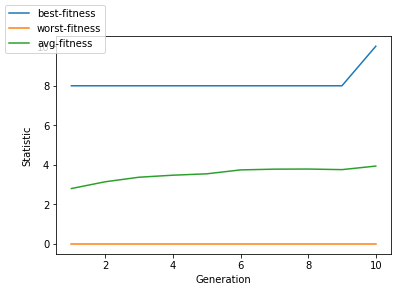

diversity [0.07069364893680345, 0.07347467590945891, 0.0788685488645506, 0.08021750432418129, 0.08054668211664583, 0.08359980861222094, 0.08316821508244607, 0.0851710749022227, 0.08489329773309576, 0.08706498722218943]


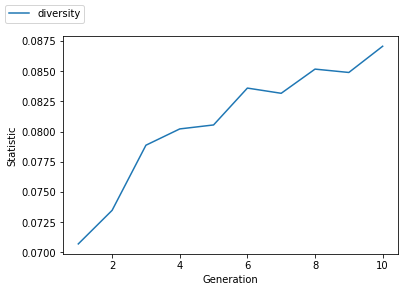

mutation_rate [0.39649627890677697, 0.39635969993793624, 0.3960950695812158, 0.3960289433158821, 0.3960128102572611, 0.39586323862677353, 0.3958843753899734, 0.39578630685173216, 0.395799905101684, 0.39654746004581193]


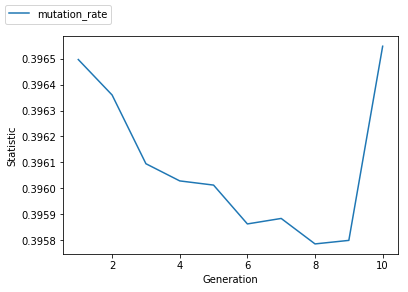

In [13]:
import matplotlib.pyplot as plt
fig = ga.statistics.plot_statistics(['best-fitness','worst-fitness','avg-fitness'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()